In [9]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we'll generate a random matrix

In [45]:
#Number of columns (features)
K = 5

#Number of records
N = 1000

#Generate an NxK matrix of uniform random variables
X = np.random.random([N, K])
X
#Student: generate a uniform random matrix here

array([[0.16311126, 0.37534877, 0.78751663, 0.74879115, 0.97171891],
       [0.90635804, 0.54552472, 0.17198217, 0.95987646, 0.68831283],
       [0.64343514, 0.84433421, 0.67943391, 0.06560405, 0.13490473],
       ...,
       [0.89436486, 0.17594844, 0.94264317, 0.81648361, 0.96467279],
       [0.73026943, 0.28633069, 0.32367914, 0.34758699, 0.11229027],
       [0.01824331, 0.20852705, 0.10217596, 0.46841938, 0.00876649]])

In [24]:
??np.random.random

#X = np.ranodom.randn([N,K])

In [25]:
??np.random.randn

Let's peak at our data to confirm it looks as we expect it

In [28]:
X.shape

(1000, 5)

In [34]:
X[0:11,]

array([[0.32150031, 0.15615936, 0.8824826 , 0.01604148, 0.24052168],
       [0.28508544, 0.81066959, 0.75566114, 0.99044607, 0.73121547],
       [0.78519125, 0.62241182, 0.50780122, 0.36271011, 0.49625392],
       [0.15795142, 0.46516275, 0.2739911 , 0.14336974, 0.22257207],
       [0.2655815 , 0.57183589, 0.18276283, 0.62076975, 0.09277252],
       [0.12356183, 0.4292835 , 0.49069387, 0.90727276, 0.10227834],
       [0.08256537, 0.13356488, 0.50347235, 0.92427871, 0.87133339],
       [0.2975303 , 0.57127547, 0.47039542, 0.02134405, 0.53570816],
       [0.62708221, 0.93576039, 0.55028217, 0.76193096, 0.78950024],
       [0.13415074, 0.59494843, 0.59343425, 0.47934217, 0.11197405],
       [0.37688469, 0.52451411, 0.36689246, 0.32720689, 0.6396856 ]])

In [46]:
#Student - Put in a command to view the first 100 rows
print(X[0:101])

[[0.16311126 0.37534877 0.78751663 0.74879115 0.97171891]
 [0.90635804 0.54552472 0.17198217 0.95987646 0.68831283]
 [0.64343514 0.84433421 0.67943391 0.06560405 0.13490473]
 [0.13955632 0.95995148 0.79648937 0.10086451 0.19711619]
 [0.76810149 0.16907104 0.57346647 0.87242605 0.18821599]
 [0.0201416  0.38563705 0.25401834 0.37524082 0.91761032]
 [0.85918472 0.34051046 0.43618718 0.19914819 0.96325266]
 [0.78553276 0.09515785 0.7669909  0.45666152 0.91559369]
 [0.22977356 0.38675269 0.89699113 0.10127543 0.83848143]
 [0.37670669 0.30938927 0.03251203 0.14711076 0.25519323]
 [0.35440957 0.63413697 0.90852828 0.17236264 0.55487659]
 [0.9584968  0.05414814 0.22353616 0.31967062 0.60411234]
 [0.20258322 0.63524888 0.64948756 0.92005002 0.37354129]
 [0.95590376 0.53445553 0.43469301 0.63732377 0.68513314]
 [0.45259941 0.28338622 0.48913531 0.45918297 0.67315672]
 [0.94639597 0.54542348 0.43437654 0.74371935 0.434347  ]
 [0.26581253 0.31633411 0.70375272 0.34292714 0.65400924]
 [0.87385238 0

In [31]:
#Student - put in a command to see the dimensions of X
len(X)
X.shape

(1000, 5)

This exercise is about designing a scoring function for a logistic regression. As we are not concerned with fitting a model to data, we can just make up a logistic regression. <br> <br>

For quick intro, the Logistic Regression takes the form of $\hat{Y} = f(x * \beta^T)$, where $x$ is the $1xK$ vector of features and $\beta$ is the $1xK$ vector of weights. The function $f$, called a 'link' function, is the inverse logit: <br><br>

<center>$f(a)=\frac{1}{1+e^{-a}}$</center> <br><br>

In this notebook we'll write a function that, given inputs of $X$ and $\beta$, returns a value for $\hat{Y}$.
<br><br>
First let's generate a random set of weights to represent $\beta$.


In [48]:
b = 10
#Student - generate a K dimensional vector of uniform random variables in the interval [-1, 1]
beta = np.random.uniform(low=-1, high=1.0, size=K)
#input command here
beta

array([ 0.90545713,  0.14976265, -0.51839588, -0.52716766,  0.72420335])

In [50]:
beta = np.random.random([1,K])
beta

array([[0.91880625, 0.43012949, 0.28939539, 0.93539319, 0.73017724]])

Notice how we applied a neat NumPy trick here. The numpy.random.random() function returns an array, yet we applied what appears to be a scalar operation on the vector. This is an example of what NumPy calls vectorization (a major point of this tutorial), which offers us both a very fast way to do run vector computations as well as a clean and concise method of coding. 

<br><br>

<b>Question: we designed the above $beta$ vector such that $E[\beta_i]=0$. How can we confirm that we did this correctly?</b>

In [63]:
#start by taking the mean of the beta we already calculated
np.mean(beta)
#Student - fill in command here



0.6607803134292951

In [65]:
np.random.random(1000).mean()

0.4985588217516456

In [66]:
np.random.random(1000) * 2

array([1.62301219e+00, 1.10827218e+00, 1.28534025e+00, 2.18529467e-01,
       1.43754913e+00, 1.51625837e+00, 3.92139743e-01, 9.14104121e-01,
       3.48601310e-01, 5.60756903e-01, 2.58187196e-01, 2.18605338e-01,
       1.05202266e+00, 1.28082825e+00, 1.93906608e+00, 1.53369508e+00,
       9.19089019e-01, 8.60068036e-01, 3.70060057e-01, 9.01114673e-01,
       1.70960331e+00, 3.12298953e-02, 1.91641808e+00, 1.13756925e-01,
       8.67781736e-01, 1.51591579e+00, 1.28027006e+00, 1.79189967e+00,
       5.56024706e-01, 6.77761926e-01, 1.29225654e+00, 1.96729547e-01,
       1.99916787e+00, 3.86566377e-02, 1.35233927e+00, 3.86170206e-01,
       1.93301404e+00, 2.74992522e-01, 7.70023369e-01, 2.59517272e-01,
       1.42541896e+00, 5.06753272e-01, 7.05297670e-01, 1.72771713e+00,
       1.66955161e+00, 1.34337175e+00, 4.83766617e-01, 1.81139463e+00,
       1.84354302e+00, 1.11782117e+00, 6.42047955e-01, 7.89312765e-01,
       7.53420750e-02, 1.36655163e+00, 4.95944164e-02, 7.28080684e-01,
      

In [70]:
#It is likely the above is not equal to zero. Let's simulate this 100k times and see what the distribution of means is
#Student input code here
i = 0
while i < 100000:
    means = [np.mean(beta)]
    means.append(means)
    #print(means)
    i +=1
#means = []
means

[0.6607803134292951, [...]]

In [75]:
for i in np.random.random(1000000):
    means = [np.mean(beta)]
    means.append(means)
    print(means)

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951, [...]]
[0.6607803134292951,

KeyboardInterrupt: 

Now let's use matplotlibs hist function to plot the histogram of means here. 

In [81]:
means = []
for i in range(100000):
    beta = np.random.random([1,K]) *2 - 1
    mean = np.mean(beta)
    means.append(mean)
    
means

[-0.19118223515391128,
 0.03877507793075754,
 0.19130816761750596,
 -0.024488874394516504,
 -0.20224057356456768,
 -0.17168923022741658,
 -0.07518932068771567,
 -0.5998069809474339,
 0.4060401186902699,
 -0.1319612285889899,
 -0.14012138634984295,
 -0.41641116720504867,
 0.24175594966325478,
 -0.02160900695329695,
 -0.2604099067107005,
 0.01664540507156098,
 -0.19790348100926886,
 0.0723953749166903,
 0.35122177312210306,
 0.04061431069780288,
 0.34008068101307315,
 -0.22423584547311531,
 -0.08646135025382677,
 0.2905137748228453,
 0.04139368431564718,
 0.17996631725212558,
 -0.04176900047138719,
 -0.06685675208561301,
 0.20628927688034646,
 0.25428970134972195,
 0.030963643579341317,
 0.15442950457101667,
 0.34929326233077673,
 -0.08859352295667708,
 0.21072839643543584,
 -0.059564962486702774,
 0.15571894943750147,
 -0.0280650872350674,
 0.17822612238022456,
 0.2550509971210309,
 0.05486191804062823,
 -0.3321432100503819,
 0.13930543233710174,
 -0.11860756967268529,
 -0.0171394218388

In [86]:
#list comprehension 
[1 if mean > 0 else -1 for mean in means if mean > 0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [92]:
ameans = [np.mean(np.random.random([1, K] * 2 - 1) for _ in range(10000))]

TypeError: unsupported operand type(s) for /: 'generator' and 'int'

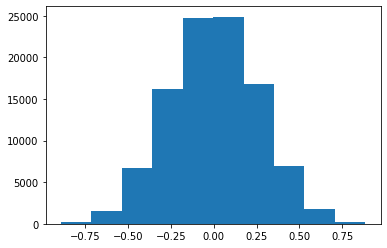

In [85]:
plt.hist(means)
plt.show()

We should expect the distribution to be centered around zero. Is it? As fun technical side, let's dive a little deeper into what this distribution should look like. The histogram shows a distribution of the average of a sample of 5 uniformly distributed random variables taken over N different samples. Can we compare this to a theoretical distribution?<br>

Yes we can! We sampled each $\beta_i$ from a uniform distribution over the interval $[-1, 1]$. The variance of a sample of uniformly distributed variables is given by $(1/12) * (b - a)^2$, where $b$ and $a$ are the min/max of the support interval. The standard error (or the standard deviation of the mean) of a sample of size K with with $Var(X) = \sigma^2$ is $\sigma / \sqrt(K)$. <br>

Given the above knowledge, we should expect our distribution of averages to be normally distributed with mean = 0 and var = $(12 * 5)^{-1} * (1 - (-1))^2 = 0.66667$. Let's compare this normal distribution to our sample above.

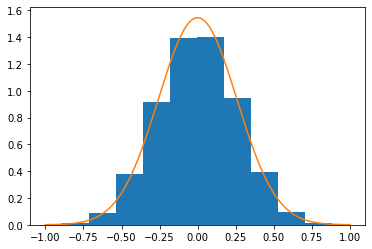

In [93]:
#Compute a vector from the normal distribution specified above
from scipy.stats import norm
mu = 0
sig = np.sqrt(4 / 60.0) 
xs = np.linspace(-1, 1, 1000)
ys = norm.pdf(xs, mu, sig) 

plt.hist(means, density = True)
plt.plot(xs, ys)
plt.show()


Now let's write our scoring function. Let's try to use as much of Numpy's inner optimization as possible (hint, this can be done in two lines and without writing any loops). The key is that numpy functions that would normally take in a scalar can also take in an array, and the function applies the operations element wise to the array and returns an array. i.e.:

In [94]:
ex_array = np.array([-1, 1])
np.abs(ex_array)

array([1, 1])

Let's use this feature to write a fast and clean scoring function

In [95]:
def score_logistic_regression(X, beta):
    '''
    This function takes in an NxK matrix X and 1xK vector beta.
    The function should apply the logistic scoring function to each record of X.
    The output should be an Nx1 vector of scores
    '''
    
    #First let's calculate X*beta - make sure to use numpy's 'dot' method
    #student - put in code here
    
    #Now let's input this into the link function
    #student - put in code here
    
    return prob_score

So how much faster is it by using Numpy? We can test this be writing the same function that uses no Numpy and executes via loops.

In [96]:
def score_logistic_regression_NoNumpy(X, beta):
    '''
    This function takes in an NxK matrix X and 1xK vector beta.
    The function should apply the logistic scoring function to each record of X.
    The output should be an Nx1 vector of scores
    '''
    #Let's calculate xbeta using loops
    xbeta = []
    for row in X:
        
        xb = 0
        for i, el in enumerate(row):
            #Student - compute X*Beta in the loop
        
        xbeta.append(xb)
        
    #Now let's apply the link function to each xbeta
    prob_score = []
    for xb in xbeta:
        #student - compute p in the loop  
        prob_score.append(p)
        
    return prob_score

IndentationError: expected an indented block (<ipython-input-96-8beb9360c3bd>, line 15)

Before doing any analysis, let's test the output of each to make sure they equal

In [ ]:
#Student - write a unit test that calls each function with the same inputs and checks to see they return the same values. 

If they equal then we can proceed with timing analysis

In [ ]:
%timeit score_logistic_regression_NoNumpy(X, beta)

In [ ]:
%timeit score_logistic_regression(X, beta)